In [3]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('../data/bank-full.csv', sep=';')

In [4]:
# Step 2: Select features for segmentation
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan']
df_seg = df[features] 

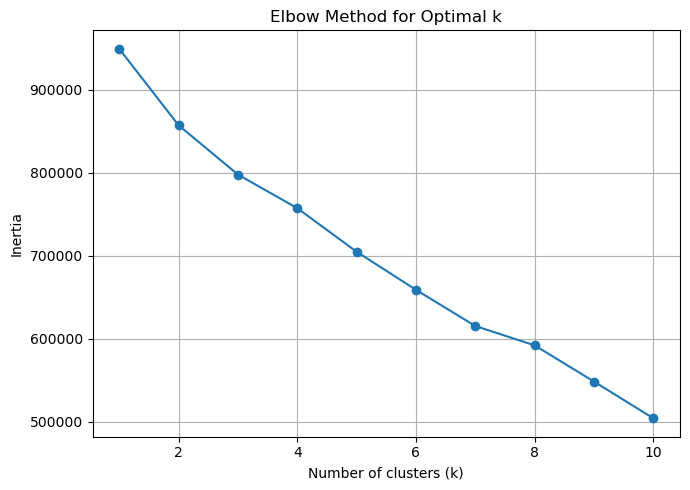

In [5]:
# Step 3: One-hot encode categorical variables
df_encoded = pd.get_dummies(df_seg, drop_first=True)

# Step 4: Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Step 5: Determine optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Step 6: Run KMeans with chosen number of clusters (k=4)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(df_scaled)

# Step 7: Add cluster labels to the original dataset
df_clustered = df.copy()
df_clustered['cluster'] = clusters

# Step 8: Create a cluster profile summary
cluster_profile = df_clustered.groupby('cluster').agg({'age': ['mean', 'min', 'max'],
                                                      'balance': ['mean', 'min', 'max'],
                                                      'housing': lambda x: x.value_counts(normalize=True).to_dict(),
                                                      'loan': lambda x: x.value_counts(normalize=True).to_dict(),
                                                      'y': lambda x: x.value_counts(normalize=True).to_dict()})

# Step 9: Display the cluster profile summary
print(cluster_profile)

# Step 10: Export clustered dataset for PowerBI dashboard
df_clustered.to_csv('../data/customer_clustered.csv', index=False)

               age              balance                \
              mean min max         mean   min     max   
cluster                                                 
0        61.626767  24  95  1984.215106 -1598   81204   
1        42.569713  20  84  1144.783048 -2122   58932   
2        40.578849  21  81  1849.513873 -6847  102127   
3        33.208535  18  69  1143.035647 -8019   56831   

                                                   housing  \
                                                  <lambda>   
cluster                                                      
0        {'no': 0.7831272084805654, 'yes': 0.2168727915...   
1        {'yes': 0.6270227662632726, 'no': 0.3729772337...   
2        {'no': 0.512454569630352, 'yes': 0.48754543036...   
3        {'yes': 0.5560946628379048, 'no': 0.4439053371...   

                                                      loan  \
                                                  <lambda>   
cluster                                  